In [ ]:
import os
import re
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from analysis.analyzer import TTTH_Analyzer
from processor.feature import FeatureProcessor

_analyzer = TTTH_Analyzer()
_processor = FeatureProcessor()
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('data_motobikes.xlsx')
df.head(3)

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
0,1,Ban xe,2.500.000 đ,NaN,NaN,"Xã Bình Chánh, Huyện Bình Chánh, Tp Hồ Chí Minh","Do mình dư xe không dùng nữa, xe máy móc vẫn c...",Aprilia,2015 RSV4 R APRC ABS,2008,20,Đã sử dụng,Tay ga,50 - 100 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-bin...
1,2,Cần bán chiếc aprillia gt rs200 xe trùm mềm,81.000.000 đ,NaN,NaN,"Phường Tân Tạo, Quận Bình Tân, Tp Hồ Chí Minh",Xe nhà trùm mềm chỉ đẩy ra đẩy vô nay phụ huyn...,Aprilia,SR GT 200,2023,5000,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-binh...
2,3,Bán xe Sr Gt 200 ít sử dụng do đi oto,72.000.000 đ,69 tr,81 tr,"Phường Bình Trưng Đông (Quận 2 cũ), Thành phố ...","Xe biển hcm, ít sử dụng còn rất mới\nLiên hệ: ***",Aprilia,SR GT 200,2022,10000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-thanh-pho...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7208 non-null   int64 
 1   Tiêu đề              7207 non-null   object
 2   Giá                  7206 non-null   object
 3   Khoảng giá min       7006 non-null   object
 4   Khoảng giá max       7011 non-null   object
 5   Địa chỉ              7167 non-null   object
 6   Mô tả chi tiết       7208 non-null   object
 7   Thương hiệu          7208 non-null   object
 8   Dòng xe              7208 non-null   object
 9   Năm đăng ký          7208 non-null   object
 10  Số Km đã đi          7208 non-null   int64 
 11  Tình trạng           7208 non-null   object
 12  Loại xe              7208 non-null   object
 13  Dung tích xe         7208 non-null   object
 14  Xuất xứ              7208 non-null   object
 15  Chính sách bảo hành  7207 non-null   object
 16  Trọng 

In [ ]:
df.isnull().sum()

id                       0
Tiêu đề                  1
Giá                      2
Khoảng giá min         202
Khoảng giá max         197
Địa chỉ                 41
Mô tả chi tiết           0
Thương hiệu              0
Dòng xe                  0
Năm đăng ký              0
Số Km đã đi              0
Tình trạng               0
Loại xe                  0
Dung tích xe             0
Xuất xứ                  0
Chính sách bảo hành      1
Trọng lượng              1
Href                     0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.columns

Index(['id', 'Tiêu đề', 'Giá', 'Khoảng giá min', 'Khoảng giá max', 'Địa chỉ',
       'Mô tả chi tiết', 'Thương hiệu', 'Dòng xe', 'Năm đăng ký',
       'Số Km đã đi', 'Tình trạng', 'Loại xe', 'Dung tích xe', 'Xuất xứ',
       'Chính sách bảo hành', 'Trọng lượng', 'Href'],
      dtype='object')

In [ ]:
data = df.drop(columns=['id','Địa chỉ','Tình trạng',
       'Chính sách bảo hành', 'Trọng lượng', 'Href'])
data.head(3)

,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Loại xe,Dung tích xe,Xuất xứ
0,Ban xe,2.500.000 đ,NaN,NaN,"Do mình dư xe không dùng nữa, xe máy móc vẫn c...",Aprilia,2015 RSV4 R APRC ABS,2008,20,Tay ga,50 - 100 cc,Việt Nam
1,Cần bán chiếc aprillia gt rs200 xe trùm mềm,81.000.000 đ,NaN,NaN,Xe nhà trùm mềm chỉ đẩy ra đẩy vô nay phụ huyn...,Aprilia,SR GT 200,2023,5000,Tay ga,100 - 175 cc,Việt Nam
2,Bán xe Sr Gt 200 ít sử dụng do đi oto,72.000.000 đ,69 tr,81 tr,"Xe biển hcm, ít sử dụng còn rất mới\nLiên hệ: ***",Aprilia,SR GT 200,2022,10000,Tay ga,100 - 175 cc,Đang cập nhật


In [ ]:
# Sắp xếp dữ liệu theo Thương hiệu, Dòng xe, Loại xe (tăng dần)
data = data.sort_values(by=['Thương hiệu', 'Dòng xe', 'Loại xe'], ascending=[True, True, True])

# Reset lại index sau khi sắp xếp
data = data.reset_index(drop=True)

# Xem 5 dòng đầu sau khi sắp xếp
data.head()

,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Loại xe,Dung tích xe,Xuất xứ
0,Ban xe,2.500.000 đ,NaN,NaN,"Do mình dư xe không dùng nữa, xe máy móc vẫn c...",Aprilia,2015 RSV4 R APRC ABS,2008,20,Tay ga,50 - 100 cc,Việt Nam
1,Cần bán chiếc aprillia gt rs200 xe trùm mềm,81.000.000 đ,NaN,NaN,Xe nhà trùm mềm chỉ đẩy ra đẩy vô nay phụ huyn...,Aprilia,SR GT 200,2023,5000,Tay ga,100 - 175 cc,Việt Nam
2,Bán xe Sr Gt 200 ít sử dụng do đi oto,72.000.000 đ,69 tr,81 tr,"Xe biển hcm, ít sử dụng còn rất mới\nLiên hệ: ***",Aprilia,SR GT 200,2022,10000,Tay ga,100 - 175 cc,Đang cập nhật
3,Nâng cấp CC để lại BMW G310R đk 2023,78.400.000 đ,72.13 tr,84.67 tr,"Xe tâm huyết rất ít chạy, chi tiết:\n- 15xxx k...",BMW,Dòng khác,2023,15600,Tay côn/Moto,Trên 175 cc,Đức
4,BMW GS1250 HP,420.000.000 đ,189.77 tr,222.77 tr,Bản GS1250 HP - ĐK 2020\nTình trạng xe:\n- Odo...,BMW,Dòng khác,2020,20091,Tay côn/Moto,Trên 175 cc,Đức


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tiêu đề         7207 non-null   object
 1   Giá             7206 non-null   object
 2   Khoảng giá min  7006 non-null   object
 3   Khoảng giá max  7011 non-null   object
 4   Mô tả chi tiết  7208 non-null   object
 5   Thương hiệu     7208 non-null   object
 6   Dòng xe         7208 non-null   object
 7   Năm đăng ký     7208 non-null   object
 8   Số Km đã đi     7208 non-null   int64 
 9   Loại xe         7208 non-null   object
 10  Dung tích xe    7208 non-null   object
 11  Xuất xứ         7208 non-null   object
dtypes: int64(1), object(11)
memory usage: 675.9+ KB


### Handle missing Value

In [ ]:
data.isnull().sum()

Tiêu đề             1
Giá                 2
Khoảng giá min    202
Khoảng giá max    197
Mô tả chi tiết      0
Thương hiệu         0
Dòng xe             0
Năm đăng ký         0
Số Km đã đi         0
Loại xe             0
Dung tích xe        0
Xuất xứ             0
dtype: int64

In [ ]:
#Chuẩn hóa cột "Giá"
data['Giá'] = (
    data['Giá']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
    # loại bỏ mọi ký tự không phải số
)

# Đổi chuỗi rỗng thành NaN
data.loc[data['Giá'] == '', 'Giá'] = np.nan

# Ép kiểu float và chia cho 1,000,000 để ra đơn vị triệu
data['Giá'] = data['Giá'].astype(float) / 1_000_000

In [ ]:
for col in ['Khoảng giá min', 'Khoảng giá max']:
    data[col] = (
        data[col]
        .astype(str)
        .str.replace('tr', '', case=False, regex=False)  # bỏ chữ "tr"
        .str.replace(',', '.')  # nếu có dấu phẩy
        .str.strip()  # bỏ khoảng trắng
    )

    # Đổi chuỗi rỗng thành NaN rồi ép kiểu float
    data.loc[data[col] == '', col] = np.nan
    data[col] = data[col].astype(float)

In [ ]:
data[['Giá', 'Khoảng giá min', 'Khoảng giá max']].head(10)

,Giá,Khoảng giá min,Khoảng giá max
0,2.5,NaN,NaN
1,81.0,NaN,NaN
2,72.0,69.00,81.00
3,78.4,72.13,84.67
4,420.0,189.77,222.77
5,90.0,189.77,222.77
6,265.0,243.80,286.20
7,435.0,254.29,298.51
8,400.0,368.00,432.00
9,700.0,NaN,NaN


In [ ]:
# Tạo bản sao để thao tác
data_clean = data.copy()
data_clean.head(3)

,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Loại xe,Dung tích xe,Xuất xứ
0,Ban xe,2.5,NaN,NaN,"Do mình dư xe không dùng nữa, xe máy móc vẫn c...",Aprilia,2015 RSV4 R APRC ABS,2008,20,Tay ga,50 - 100 cc,Việt Nam
1,Cần bán chiếc aprillia gt rs200 xe trùm mềm,81.0,NaN,NaN,Xe nhà trùm mềm chỉ đẩy ra đẩy vô nay phụ huyn...,Aprilia,SR GT 200,2023,5000,Tay ga,100 - 175 cc,Việt Nam
2,Bán xe Sr Gt 200 ít sử dụng do đi oto,72.0,69.0,81.0,"Xe biển hcm, ít sử dụng còn rất mới\nLiên hệ: ***",Aprilia,SR GT 200,2022,10000,Tay ga,100 - 175 cc,Đang cập nhật


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tiêu đề         7207 non-null   object 
 1   Giá             7206 non-null   float64
 2   Khoảng giá min  7006 non-null   float64
 3   Khoảng giá max  7011 non-null   float64
 4   Mô tả chi tiết  7208 non-null   object 
 5   Thương hiệu     7208 non-null   object 
 6   Dòng xe         7208 non-null   object 
 7   Năm đăng ký     7208 non-null   object 
 8   Số Km đã đi     7208 non-null   int64  
 9   Loại xe         7208 non-null   object 
 10  Dung tích xe    7208 non-null   object 
 11  Xuất xứ         7208 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 675.9+ KB


In [ ]:
# 1. Xóa dòng thiếu tiêu đề hoặc giá
data_clean = data_clean.dropna(subset=['Tiêu đề', 'Giá'])

# 2. Điền khoảng giá min/max bằng cột Giá
data_clean['Khoảng giá min'] = data_clean['Khoảng giá min'].fillna(data_clean['Giá'])
data_clean['Khoảng giá max'] = data_clean['Khoảng giá max'].fillna(data_clean['Giá'])

# 3. Nếu vẫn còn NaN, điền median theo Thương hiệu
data_clean['Khoảng giá min'] = data_clean.groupby('Thương hiệu')['Khoảng giá min'].transform(
    lambda x: x.fillna(x.median())
)
data_clean['Khoảng giá max'] = data_clean.groupby('Thương hiệu')['Khoảng giá max'].transform(
    lambda x: x.fillna(x.median())
)

data_clean.isnull().sum()

Tiêu đề           0
Giá               0
Khoảng giá min    0
Khoảng giá max    0
Mô tả chi tiết    0
Thương hiệu       0
Dòng xe           0
Năm đăng ký       0
Số Km đã đi       0
Loại xe           0
Dung tích xe      0
Xuất xứ           0
dtype: int64

In [ ]:
def price_segment(price):
    """
    Phân loại xe theo phân khúc giá.
    - Phổ thông: < 70 triệu
    - Cận cao cấp: 70–200 triệu
    - Cao cấp: > 200 triệu
    """
    if price < 70:
        return "Phổ thông"
    elif price < 200:
        return "Cận cao cấp"
    else:
        return "Cao cấp"

data_clean["Phân khúc giá"] = data_clean["Giá"].apply(price_segment)

# Kiểm tra số lượng từng phân khúc
print("📊 Phân bố theo phân khúc giá:")
print(data_clean["Phân khúc giá"].value_counts())
print("-" * 40)

📊 Phân bố theo phân khúc giá:
Phân khúc giá
Phổ thông      6567
Cận cao cấp     539
Cao cấp         100
Name: count, dtype: int64
----------------------------------------


In [ ]:
# Xem các mẫu có giá cực cao
outliers = data_clean[data_clean["Giá"] > 800]  # giá > 800 triệu
print('Các mẫu giá > 800 triệu:')
display(outliers[["Thương hiệu", "Dòng xe", "Giá", "Phân khúc giá"]])

Các mẫu giá > 800 triệu:


,Thương hiệu,Dòng xe,Giá,Phân khúc giá
110,Harley Davidson,Touring,886.0,Cao cấp
742,Honda,Air Blade,3500.0,Cao cấp
2500,Honda,SH,136000.0,Cao cấp
5057,Piaggio,Vespa,890.0,Cao cấp
7196,Yamaha,YAZ,2000.0,Cao cấp


In [ ]:
data_clean.head(5)

,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Loại xe,Dung tích xe,Xuất xứ,Phân khúc giá
0,Ban xe,2.5,2.50,2.50,"Do mình dư xe không dùng nữa, xe máy móc vẫn c...",Aprilia,2015 RSV4 R APRC ABS,2008,20,Tay ga,50 - 100 cc,Việt Nam,Phổ thông
1,Cần bán chiếc aprillia gt rs200 xe trùm mềm,81.0,81.00,81.00,Xe nhà trùm mềm chỉ đẩy ra đẩy vô nay phụ huyn...,Aprilia,SR GT 200,2023,5000,Tay ga,100 - 175 cc,Việt Nam,Cận cao cấp
2,Bán xe Sr Gt 200 ít sử dụng do đi oto,72.0,69.00,81.00,"Xe biển hcm, ít sử dụng còn rất mới\nLiên hệ: ***",Aprilia,SR GT 200,2022,10000,Tay ga,100 - 175 cc,Đang cập nhật,Cận cao cấp
3,Nâng cấp CC để lại BMW G310R đk 2023,78.4,72.13,84.67,"Xe tâm huyết rất ít chạy, chi tiết:\n- 15xxx k...",BMW,Dòng khác,2023,15600,Tay côn/Moto,Trên 175 cc,Đức,Cận cao cấp
4,BMW GS1250 HP,420.0,189.77,222.77,Bản GS1250 HP - ĐK 2020\nTình trạng xe:\n- Odo...,BMW,Dòng khác,2020,20091,Tay côn/Moto,Trên 175 cc,Đức,Cao cấp


In [ ]:
data_clean.columns

Index(['Tiêu đề', 'Giá', 'Khoảng giá min', 'Khoảng giá max', 'Mô tả chi tiết',
       'Thương hiệu', 'Dòng xe', 'Năm đăng ký', 'Số Km đã đi', 'Loại xe',
       'Dung tích xe', 'Xuất xứ', 'Phân khúc giá'],
      dtype='object')

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7206 entries, 0 to 7207
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tiêu đề         7206 non-null   object 
 1   Giá             7206 non-null   float64
 2   Khoảng giá min  7206 non-null   float64
 3   Khoảng giá max  7206 non-null   float64
 4   Mô tả chi tiết  7206 non-null   object 
 5   Thương hiệu     7206 non-null   object 
 6   Dòng xe         7206 non-null   object 
 7   Năm đăng ký     7206 non-null   object 
 8   Số Km đã đi     7206 non-null   int64  
 9   Loại xe         7206 non-null   object 
 10  Dung tích xe    7206 non-null   object 
 11  Xuất xứ         7206 non-null   object 
 12  Phân khúc giá   7206 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 788.2+ KB


In [ ]:
data_clean.describe(include='all').T.head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Tiêu đề,7206,6838,Bán xe,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Giá,7206.0,NaN,NaN,NaN,49.241942,1603.077312,0.0,8.5,16.5,32.5,136000.0
Khoảng giá min,7206.0,NaN,NaN,NaN,24.573404,33.336458,1.23,7.98,14.57,28.44,815.12
Khoảng giá max,7206.0,NaN,NaN,NaN,28.615759,37.890252,1.44,9.36,17.05,33.39,956.88
Mô tả chi tiết,7206,7181,Mình cần bán xe như hình \nXe giấy tờ đầy đủ n...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thương hiệu,7206,37,Honda,4374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dòng xe,7206,195,Wave,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Năm đăng ký,7206,79,2019,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Số Km đã đi,7206.0,NaN,NaN,NaN,64391.883014,136589.872598,0.0,10000.0,28000.0,53415.25,999999.0
Loại xe,7206,3,Tay ga,3599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_clean['Năm đăng ký'].unique()

array(['2008', '2023', '2022', '2020', '2016', '2019', '2018', '2021',
       '2024', '2025', '2017', '2015', 2019, '2001', '2000', '2010',
       '2014', '1998', '1996', '1999', '2012', '2006', 2017, 2020, '2011',
       'trước năm 1980', '1987', '1991', '1997', '2007', '2004', '1990',
       '1981', '1984', '2002', '2005', '2013', '2009', 1994, 2001, 2022,
       2021, 2023, 2007, 2012, 2011, 2016, 2010, 2009, 2013, 2015, 2008,
       2018, 2014, 2024, 1982, '1995', 1988, '1982', '1993', 2006, 1997,
       1996, '1992', '2003', '1994', 2004, 1995, '1986', '1985', '1989',
       '1988', 2005, 1998, 2000, 2003, 2002, 1999, 2025], dtype=object)

In [ ]:
# Thay các giá trị đặc biệt
data_clean['Năm đăng ký'] = data_clean['Năm đăng ký'].replace({
    'trước năm 1980': '1979',
    'Đang cập nhật': np.nan,
    'Không rõ': np.nan
})


In [ ]:
data_clean['Năm đăng ký'].unique()

array(['2008', '2023', '2022', '2020', '2016', '2019', '2018', '2021',
       '2024', '2025', '2017', '2015', 2019, '2001', '2000', '2010',
       '2014', '1998', '1996', '1999', '2012', '2006', 2017, 2020, '2011',
       '1979', '1987', '1991', '1997', '2007', '2004', '1990', '1981',
       '1984', '2002', '2005', '2013', '2009', 1994, 2001, 2022, 2021,
       2023, 2007, 2012, 2011, 2016, 2010, 2009, 2013, 2015, 2008, 2018,
       2014, 2024, 1982, '1995', 1988, '1982', '1993', 2006, 1997, 1996,
       '1992', '2003', '1994', 2004, 1995, '1986', '1985', '1989', '1988',
       2005, 1998, 2000, 2003, 2002, 1999, 2025], dtype=object)

In [ ]:
# Chuyển sang kiểu int
data_clean['Năm đăng ký'] = pd.to_numeric(data_clean['Năm đăng ký'], errors='coerce')
data_clean['Năm đăng ký'] = data_clean['Năm đăng ký'].astype(int)

In [ ]:
data_clean['Năm đăng ký'].describe()

count    7206.000000
mean     2013.712462
std         7.907114
min      1979.000000
25%      2010.000000
50%      2015.000000
75%      2019.000000
max      2025.000000
Name: Năm đăng ký, dtype: float64

In [ ]:
# Chuyển về numeric
data_clean[['Giá', 'Khoảng giá min', 'Khoảng giá max']] = data_clean[
    ['Giá', 'Khoảng giá min', 'Khoảng giá max']
].astype(float)

In [ ]:
# Giá = 0 hoặc > 5000: sử lý lỗi nhập sai giá
data_clean = data_clean[(data_clean['Giá'] > 1) & (data_clean['Giá'] < 5000)]


In [ ]:
data_clean.loc[data_clean['Số Km đã đi'] > 99999, 'Số Km đã đi'] = 99999

In [ ]:
# Làm sạch text
for col in ['Thương hiệu', 'Dòng xe', 'Loại xe', 'Dung tích xe', 'Xuất xứ', 'Phân khúc giá']:
    data_clean[col] = data_clean[col].str.strip().str.title()

# Dung tích xe: map định lượng
def parse_cc(val):
    if 'Dưới' in val: return 40
    if '50 - 100' in val: return 75
    if '100 - 175' in val: return 137
    if 'Trên 175' in val: return 200
    return np.nan
data_clean['cc_numeric'] = data_clean['Dung tích xe'].apply(parse_cc)

In [ ]:
# Phân khúc giá: map ordinal
price_segment_map = {'Phổ Thông': 1, 'Cận Cao Cấp': 2, 'Cao Cấp': 3}
data_clean['price_segment_code'] = data_clean['Phân khúc giá'].map(price_segment_map)

In [ ]:
min_age = 0.5  # năm (6 tháng). Thay bằng 1/12 ~ 0.083 để xấp xỉ 1 tháng nếu cần

data_clean['age'] = 2025 - data_clean['Năm đăng ký']

# Kiểm tra số bản ghi có age == 0
num_zero_age = (data_clean['age'] == 0).sum()
print(f"Records with age == 0: {num_zero_age}")

# Thay age == 0 bằng min_age (không loại bỏ)
data_clean.loc[data_clean['age'] <= 0, 'age'] = min_age

Records with age == 0: 71


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7138 entries, 0 to 7207
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tiêu đề             7138 non-null   object 
 1   Giá                 7138 non-null   float64
 2   Khoảng giá min      7138 non-null   float64
 3   Khoảng giá max      7138 non-null   float64
 4   Mô tả chi tiết      7138 non-null   object 
 5   Thương hiệu         7138 non-null   object 
 6   Dòng xe             7138 non-null   object 
 7   Năm đăng ký         7138 non-null   int32  
 8   Số Km đã đi         7138 non-null   int64  
 9   Loại xe             7138 non-null   object 
 10  Dung tích xe        7138 non-null   object 
 11  Xuất xứ             7138 non-null   object 
 12  Phân khúc giá       7138 non-null   object 
 13  cc_numeric          7073 non-null   float64
 14  price_segment_code  7138 non-null   int64  
 15  age                 7138 non-null   float64
dtypes: float64(

In [ ]:
data_clean.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Tiêu đề,7138,6781,Bán xe,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Giá,7138.0,NaN,NaN,NaN,30.655065,65.461764,1.2,8.5,16.5,33.0,3500.0
Khoảng giá min,7138.0,NaN,NaN,NaN,24.507535,33.166395,1.23,7.98,14.53,28.44,815.12
Khoảng giá max,7138.0,NaN,NaN,NaN,28.536234,37.671415,1.44,9.36,17.05,33.39,956.88
Mô tả chi tiết,7138,7113,Mình cần bán xe như hình \nXe giấy tờ đầy đủ n...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thương hiệu,7138,37,Honda,4333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dòng xe,7138,194,Wave,723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Năm đăng ký,7138.0,NaN,NaN,NaN,2013.716867,7.878889,1979.0,2010.0,2015.0,2019.0,2025.0
Số Km đã đi,7138.0,NaN,NaN,NaN,36874.275147,32607.12846,0.0,10000.0,28000.0,53243.25,99999.0
Loại xe,7138,3,Tay Ga,3567,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7138 entries, 0 to 7207
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tiêu đề             7138 non-null   object 
 1   Giá                 7138 non-null   float64
 2   Khoảng giá min      7138 non-null   float64
 3   Khoảng giá max      7138 non-null   float64
 4   Mô tả chi tiết      7138 non-null   object 
 5   Thương hiệu         7138 non-null   object 
 6   Dòng xe             7138 non-null   object 
 7   Năm đăng ký         7138 non-null   int32  
 8   Số Km đã đi         7138 non-null   int64  
 9   Loại xe             7138 non-null   object 
 10  Dung tích xe        7138 non-null   object 
 11  Xuất xứ             7138 non-null   object 
 12  Phân khúc giá       7138 non-null   object 
 13  cc_numeric          7073 non-null   float64
 14  price_segment_code  7138 non-null   int64  
 15  age                 7138 non-null   float64
dtypes: float64(

In [ ]:
data_clean.head(5)

,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Loại xe,Dung tích xe,Xuất xứ,Phân khúc giá,cc_numeric,price_segment_code,age
0,Ban xe,2.5,2.50,2.50,"Do mình dư xe không dùng nữa, xe máy móc vẫn c...",Aprilia,2015 Rsv4 R Aprc Abs,2008,20,Tay Ga,50 - 100 Cc,Việt Nam,Phổ Thông,75.0,1,17.0
1,Cần bán chiếc aprillia gt rs200 xe trùm mềm,81.0,81.00,81.00,Xe nhà trùm mềm chỉ đẩy ra đẩy vô nay phụ huyn...,Aprilia,Sr Gt 200,2023,5000,Tay Ga,100 - 175 Cc,Việt Nam,Cận Cao Cấp,137.0,2,2.0
2,Bán xe Sr Gt 200 ít sử dụng do đi oto,72.0,69.00,81.00,"Xe biển hcm, ít sử dụng còn rất mới\nLiên hệ: ***",Aprilia,Sr Gt 200,2022,10000,Tay Ga,100 - 175 Cc,Đang Cập Nhật,Cận Cao Cấp,137.0,2,3.0
3,Nâng cấp CC để lại BMW G310R đk 2023,78.4,72.13,84.67,"Xe tâm huyết rất ít chạy, chi tiết:\n- 15xxx k...",Bmw,Dòng Khác,2023,15600,Tay Côn/Moto,Trên 175 Cc,Đức,Cận Cao Cấp,200.0,2,2.0
4,BMW GS1250 HP,420.0,189.77,222.77,Bản GS1250 HP - ĐK 2020\nTình trạng xe:\n- Odo...,Bmw,Dòng Khác,2020,20091,Tay Côn/Moto,Trên 175 Cc,Đức,Cao Cấp,200.0,3,5.0


In [ ]:
data_clean.isnull().sum()

Tiêu đề                0
Giá                    0
Khoảng giá min         0
Khoảng giá max         0
Mô tả chi tiết         0
Thương hiệu            0
Dòng xe                0
Năm đăng ký            0
Số Km đã đi            0
Loại xe                0
Dung tích xe           0
Xuất xứ                0
Phân khúc giá          0
cc_numeric            65
price_segment_code     0
age                    0
dtype: int64

In [ ]:
_processor.handle_missing_values_by_median('cc_numeric', data_clean)

cc_numeric before fill missing values: 65
cc_numeric after fill missing values: 0


In [ ]:
data_clean.isnull().sum()


Tiêu đề               0
Giá                   0
Khoảng giá min        0
Khoảng giá max        0
Mô tả chi tiết        0
Thương hiệu           0
Dòng xe               0
Năm đăng ký           0
Số Km đã đi           0
Loại xe               0
Dung tích xe          0
Xuất xứ               0
Phân khúc giá         0
cc_numeric            0
price_segment_code    0
age                   0
dtype: int64

### Handle Outlier

In [ ]:
numeric_cols = [
    "Giá", "Khoảng giá min", "Khoảng giá max",
    "Số Km đã đi", "age", "cc_numeric"]

In [ ]:
data_clean[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Giá,7138.0,30.655065,65.461764,1.20,8.50,16.50,33.00,3500.00
Khoảng giá min,7138.0,24.507535,33.166395,1.23,7.98,14.53,28.44,815.12
Khoảng giá max,7138.0,28.536234,37.671415,1.44,9.36,17.05,33.39,956.88
Số Km đã đi,7138.0,36874.275147,32607.128460,0.00,10000.00,28000.00,53243.25,99999.00
age,7138.0,11.288106,7.871919,0.50,6.00,10.00,15.00,46.00
cc_numeric,7138.0,130.037966,29.253993,40.00,137.00,137.00,137.00,200.00


In [ ]:
# Lọc ra các xe có giá > 500 triệu
high_price_bikes = data_clean[data_clean["Giá"] > 400]

# Hiển thị thông tin quan trọng để kiểm tra
cols_to_show = [
    "Thương hiệu", "Dòng xe", "Giá",
    "Khoảng giá min", "Khoảng giá max",
    "Số Km đã đi", "Năm đăng ký"
]

high_price_bikes[cols_to_show].sort_values(by="Giá", ascending=False).head(20)

,Thương hiệu,Dòng xe,Giá,Khoảng giá min,Khoảng giá max,Số Km đã đi,Năm đăng ký
742,Honda,Air Blade,3500.0,7.57,8.89,3000,2008
7196,Yamaha,Yaz,2000.0,244.19,286.66,20,2016
5057,Piaggio,Vespa,890.0,59.58,69.94,0,2023
110,Harley Davidson,Touring,886.0,815.12,956.88,40000,2019
9,Bmw,R Nine T,700.0,700.00,700.00,12000,2023
2631,Honda,Sh,650.0,46.96,55.13,5555,2013
5871,Yamaha,Exciter,550.0,23.55,27.65,2,2025
1417,Honda,Dòng Khác,490.0,47.37,55.61,9600,2021
7199,Yamaha,Yaz,480.0,52.44,61.56,800,2024
7,Bmw,Dòng Khác,435.0,254.29,298.51,14000,2019


In [ ]:
# Danh sách thương hiệu mô tô cao cấp
premium_brands = ['BMW', 'Harley Davidson', 'Ducati', 'Triumph', 'Kawasaki', 'Benelli']

# Áp dụng ngưỡng giá tối đa cho xe phổ thông
data_clean.loc[
    (~data_clean['Thương hiệu'].isin(premium_brands)) & (data_clean['Giá'] > 300),
    'Giá'
] = 300

In [ ]:
# Lọc ra các xe có giá > 300 triệu
high_price_bikes = data_clean[data_clean["Giá"] > 300]

# Hiển thị thông tin quan trọng để kiểm tra
cols_to_show = [
    "Thương hiệu", "Dòng xe", "Giá",
    "Khoảng giá min", "Khoảng giá max",
    "Số Km đã đi", "Năm đăng ký"
]

high_price_bikes[cols_to_show].sort_values(by="Giá", ascending=False).head(20)

,Thương hiệu,Dòng xe,Giá,Khoảng giá min,Khoảng giá max,Số Km đã đi,Năm đăng ký
110,Harley Davidson,Touring,886.0,815.12,956.88,40000,2019
72,Ducati,Multistrada,395.0,363.40,426.60,2600,2022
104,Harley Davidson,Dòng Khác,375.0,375.00,375.00,36000,2008
106,Harley Davidson,Sportster,360.0,360.00,360.00,4000,2023
107,Harley Davidson,Sportster,360.0,360.00,360.00,4000,2023
108,Harley Davidson,Sportster,360.0,360.00,360.00,4000,2023
5780,Triumph,Dòng Khác,360.0,280.60,329.40,8820,2019
101,Harley Davidson,48,350.0,300.23,352.44,1485,2020
102,Harley Davidson,48,350.0,308.20,361.80,7000,2022
4780,Kawasaki,Z1000,350.0,261.28,306.72,163,2024


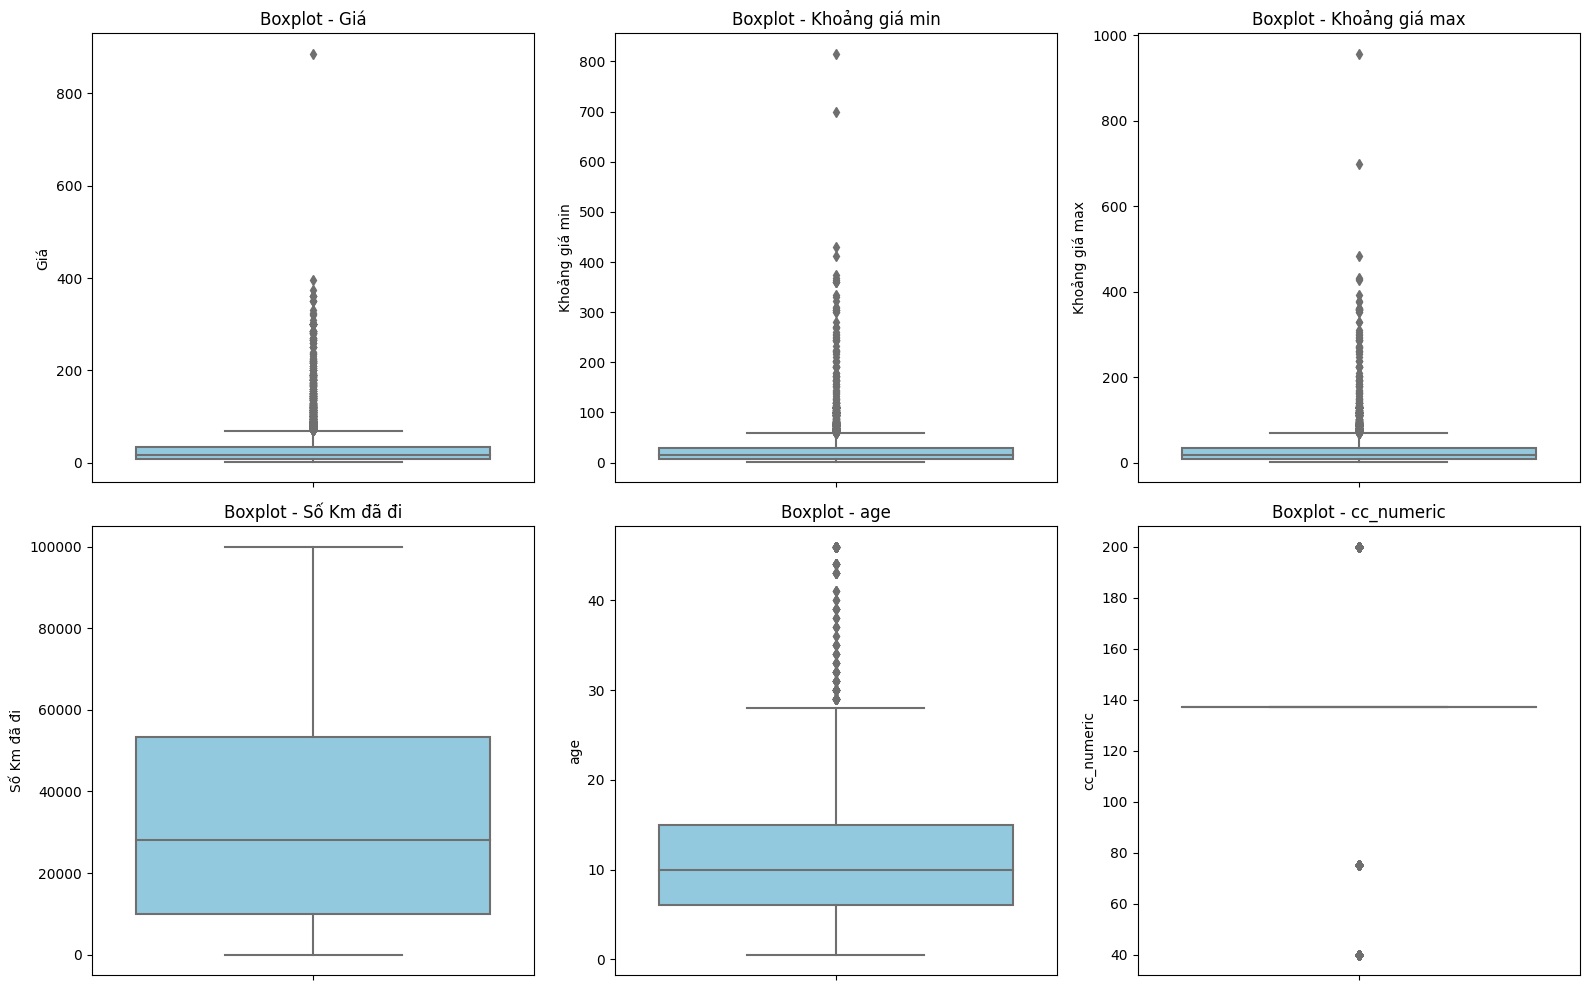

In [ ]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data_clean, y=col, color='skyblue')
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
plt.show()

In [ ]:
Q1 = data_clean[numeric_cols].quantile(0.25)
Q3 = data_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (data_clean[numeric_cols] < (Q1 - 1.5 * IQR)) | (data_clean[numeric_cols] > (Q3 + 1.5 * IQR))
outlier_counts = outlier_mask.sum().sort_values(ascending=False)
print(outlier_counts)

cc_numeric        1265
Giá                640
Khoảng giá min     600
Khoảng giá max     595
age                224
Số Km đã đi          0
dtype: int64


In [ ]:
uppers, lowers = [], []
remove_outlier_cols = numeric_cols
for remove_outlier_col in remove_outlier_cols:
    outliers_index = _analyzer.check_outlier_of_numerical_variable(
        remove_outlier_col, data_clean
    )
    if outliers_index:
        upper, lower = outliers_index
        uppers.extend(upper)
        lowers.extend(lower)

variable Giá have 8.966% upper outlier
variable Giá have 0.0% lower outlier
variable Khoảng giá min have 8.406% upper outlier
variable Khoảng giá min have 0.0% lower outlier
variable Khoảng giá max have 8.336% upper outlier
variable Khoảng giá max have 0.0% lower outlier
Variable Số Km đã đi have no outlier
variable age have 3.138% upper outlier
variable age have 0.0% lower outlier
variable cc_numeric have 4.315% upper outlier
variable cc_numeric have 13.407% lower outlier


### Xử lý NLP

In [ ]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Định nghĩa các nhóm keyword

# Nhóm 1: MỚI / TÌNH TRẠNG XE
kw_moi = [
    "mới", "còn mới", "như mới", "mới 95", "mới 99", "mới tinh",
    "xe lướt", "xe ít đi", "ít sử dụng", "xe để không", "để kho",
    "keng", "leng keng", "nguyên zin", "zin 100%", "zin nguyên bản",
    "dán keo", "dán ppf", "ngoại hình đẹp", "dàn áo liền lạc", "đẹp như hình"
]
# Nhóm 2: ĐỘ XE / ĐỒ CHƠI / NÂNG CẤP
kw_do_xe = [
    "độ", "đồ chơi", "full đồ", "pô độ", "pô móc", "phuộc rcb", "tay thắng",
    "lên đồ", "tem độ", "lên full đồ", "đồ zin còn đủ", "kính gió", "thùng givi",
    "ốc titan", "mão gió", "bao tay", "trợ lực", "độ máy"
]
# Nhóm 3: MỨC ĐỘ SỬ DỤNG
kw_su_dung = [
    "ít đi", "đi làm", "đi học", "đi phượt", "đi cà phê", "để không",
    "ít sử dụng", "xe gia đình", "xe công ty", "dư xe", "đi lại nhẹ nhàng",
    "xe nữ dùng", "xe nữ chạy", "xe để lâu", "ít chạy", "đi gần"
]
# Nhóm 4: BẢO DƯỠNG / SỬA CHỮA
kw_bao_duong = [
    "bảo dưỡng", "bảo trì", "thay nhớt", "vệ sinh", "bao test", "đi bảo dưỡng",
    "bảo dưỡng định kỳ", "mới thay bình", "mới làm nồi", "đã làm lại máy",
    "thay bố thắng", "thay lọc", "bảo dưỡng lớn", "chỉnh sên", "xe kỹ"
]
# Nhóm 5: ĐỘ BỀN / MÁY MÓC / CHẤT LƯỢNG
kw_do_ben = [
    "máy êm", "nổ êm", "chạy êm", "máy mạnh", "máy bốc", "tiết kiệm xăng",
    "ổn định", "chạy ngon", "không xì nhớt", "không rò rỉ", "không lỗi",
    "máy khô ráo", "máy tốt", "chạy mượt", "vận hành ổn định", "êm ái",
    "bền bỉ", "máy móc zin", "chạy bình thường", "hoạt động tốt"
]
# Nhóm 6: GIẤY TỜ / PHÁP LÝ
kw_phap_ly = [
    "chính chủ", "ủy quyền", "bao sang tên", "cà vẹt", "giấy tờ đầy đủ",
    "giấy tờ hợp lệ", "hồ sơ gốc", "bstp", "bao công chứng",
    "bao tranh chấp", "ra tên", "cavet", "hợp pháp"
]


In [ ]:
# Hàm check từ khóa xuất hiện trong mô tả
def keyword_flag(text: str, keywords: list[str]) -> int:
    """
    Kiểm tra xem text có chứa ít nhất 1 từ khóa trong danh sách không.
    Trả về 1 nếu có, 0 nếu không.
    """
    if pd.isna(text):
        return 0
    text = text.lower()
    return int(any(re.search(rf"(?<!\w){re.escape(kw)}(?!\w)", text) for kw in keywords))


In [ ]:
# Làm sạch và chuẩn hóa văn bản
def clean_text(text: str) -> str:
    """
    Chuẩn hóa mô tả:
    - Chuyển về chữ thường
    - Bỏ URL, ký tự đặc biệt, số
    - Chuẩn hóa khoảng trắng
    """
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [ ]:
# Loại bỏ stopwords tiếng Việt
vietnamese_stopwords = set([
    "xe", "máy", "bán", "cần", "mua", "báo", "liên", "hệ", "anh", "chị",
    "em", "mn", "mọi", "người", "xin", "cảm", "ơn", "chợ", "tốt", "đầy",
    "đủ", "điện", "thoại", "địa", "chỉ", "số", "của", "và", "với", "còn",
    "thì", "nên", "rất", "đã", "được", "ko", "kg", "thật", "là", "thôi",
    "nha", "nhé", "ạ", "nhưng", "bởi", "vì", "thì", "nào", "vậy"
])

def remove_stopwords(text: str) -> str:
    words = text.split()
    return " ".join([w for w in words if w not in vietnamese_stopwords])

In [ ]:
# data_clean["clean_text"] = data_clean["Mô tả chi tiết"].apply(clean_text)
data_clean['Content'] = data_clean['Mô tả chi tiết'].apply(lambda x: ' '.join(x.split()[:200]))
data_clean['clean_text'] = data_clean['Mô tả chi tiết'].apply(clean_text)

In [ ]:
data_clean["clean_text"] = data_clean["clean_text"].apply(remove_stopwords)


In [ ]:
data_clean.head(2)

,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Loại xe,Dung tích xe,Xuất xứ,Phân khúc giá,cc_numeric,price_segment_code,age,desc_clean
0,Ban xe,2.5,2.5,2.5,"Do mình dư xe không dùng nữa, xe máy móc vẫn c...",Aprilia,2015 Rsv4 R Aprc Abs,2008,20,Tay Ga,50 - 100 Cc,Việt Nam,Phổ Thông,75.0,1,17.0,do mình dư không dùng nữa móc vẫn zin êm ru mì...
1,Cần bán chiếc aprillia gt rs200 xe trùm mềm,81.0,81.0,81.0,Xe nhà trùm mềm chỉ đẩy ra đẩy vô nay phụ huyn...,Aprilia,Sr Gt 200,2023,5000,Tay Ga,100 - 175 Cc,Việt Nam,Cận Cao Cấp,137.0,2,2.0,nhà trùm mềm đẩy ra đẩy vô nay phụ huynh lớn t...


In [ ]:
# Áp dụng tạo đặc trưng mới

data_clean["is_moi"] = data_clean["desc_clean"].apply(lambda x: keyword_flag(x, kw_moi))
data_clean["is_do_xe"] = data_clean["desc_clean"].apply(lambda x: keyword_flag(x, kw_do_xe))
data_clean["is_su_dung_nhieu"] = data_clean["desc_clean"].apply(lambda x: keyword_flag(x, kw_su_dung))
data_clean["is_bao_duong"] = data_clean["desc_clean"].apply(lambda x: keyword_flag(x, kw_bao_duong))
data_clean["is_do_ben"] = data_clean["desc_clean"].apply(lambda x: keyword_flag(x, kw_do_ben))
data_clean["is_phap_ly"] = data_clean["desc_clean"].apply(lambda x: keyword_flag(x, kw_phap_ly))


In [ ]:
data_clean[[
    "is_moi", "is_do_xe", "is_su_dung_nhieu",
    "is_bao_duong", "is_do_ben", "is_phap_ly"
]].sum()

is_moi              2712
is_do_xe             470
is_su_dung_nhieu     919
is_bao_duong         755
is_do_ben            752
is_phap_ly          3333
dtype: int64

In [ ]:
data_clean.head(3)

,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Loại xe,...,cc_numeric,price_segment_code,age,desc_clean,is_moi,is_do_xe,is_su_dung_nhieu,is_bao_duong,is_do_ben,is_phap_ly
0,Ban xe,2.5,2.5,2.5,"Do mình dư xe không dùng nữa, xe máy móc vẫn c...",Aprilia,2015 Rsv4 R Aprc Abs,2008,20,Tay Ga,...,75.0,1,17.0,do mình dư không dùng nữa móc vẫn zin êm ru mì...,0,0,0,0,0,0
1,Cần bán chiếc aprillia gt rs200 xe trùm mềm,81.0,81.0,81.0,Xe nhà trùm mềm chỉ đẩy ra đẩy vô nay phụ huyn...,Aprilia,Sr Gt 200,2023,5000,Tay Ga,...,137.0,2,2.0,nhà trùm mềm đẩy ra đẩy vô nay phụ huynh lớn t...,0,0,0,0,0,0
2,Bán xe Sr Gt 200 ít sử dụng do đi oto,72.0,69.0,81.0,"Xe biển hcm, ít sử dụng còn rất mới\nLiên hệ: ***",Aprilia,Sr Gt 200,2022,10000,Tay Ga,...,137.0,2,3.0,biển hcm ít sử dụng mới,1,0,1,0,0,0


In [ ]:
#data_clean = data_clean.drop(columns=['Tiêu đề', 'Mô tả chi tiết'])
#data_clean.to_excel('data_cleaned.xlsx', index=False)

In [ ]:
data_clean.to_excel('data_content_cleaned.xlsx', index=False)